**SVM Classifier for Wine Quality**

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

In [26]:
url_wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url_wine, delimiter=';')

In [27]:
print("Missing values:\n", wine_data.isnull().sum())

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


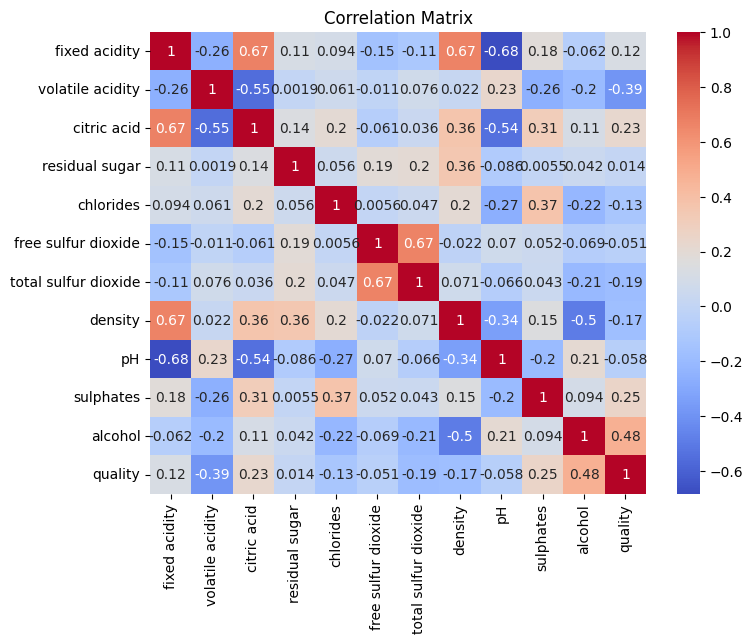

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [29]:
X_wine = wine_data.drop('quality', axis=1)
y_wine = wine_data['quality']

In [30]:
y_wine = wine_data['quality']
y_wine = (y_wine >= 6).astype(int)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

In [31]:
scaler = StandardScaler()
X_train_wine = scaler.fit_transform(X_train_wine)
X_test_wine = scaler.transform(X_test_wine)

In [32]:
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train_wine, y_train_wine)

y_pred_wine = svm_classifier.predict(X_test_wine)
print("Accuracy:", accuracy_score(y_test_wine, y_pred_wine))
print("Classification Report:\n", classification_report(y_test_wine, y_pred_wine))

Accuracy: 0.728125
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.78      0.72       141
           1       0.80      0.69      0.74       179

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.74      0.73      0.73       320



In [33]:
y_prob_wine = svm_classifier.predict_proba(X_test_wine)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_wine, y_prob_wine)
roc_auc = roc_auc_score(y_test_wine, y_prob_wine)

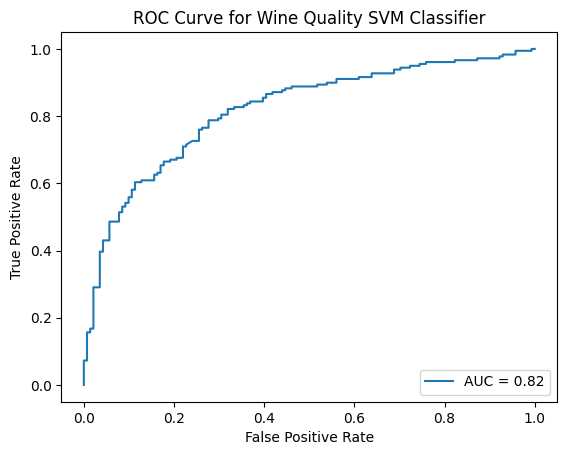

In [34]:
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Wine Quality SVM Classifier')
plt.legend(loc="lower right")
plt.show()

**SVM Regressor for Concrete Compressive Strength**

In [35]:
pip install scikit-learn pandas matplotlib seaborn


In [36]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
url_concrete = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls'
concrete_data = pd.read_excel(url_concrete)

In [38]:
concrete_data.columns = concrete_data.columns.str.strip()

In [39]:
print("Missing values:\n", concrete_data.isnull().sum())

Missing values:
 Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


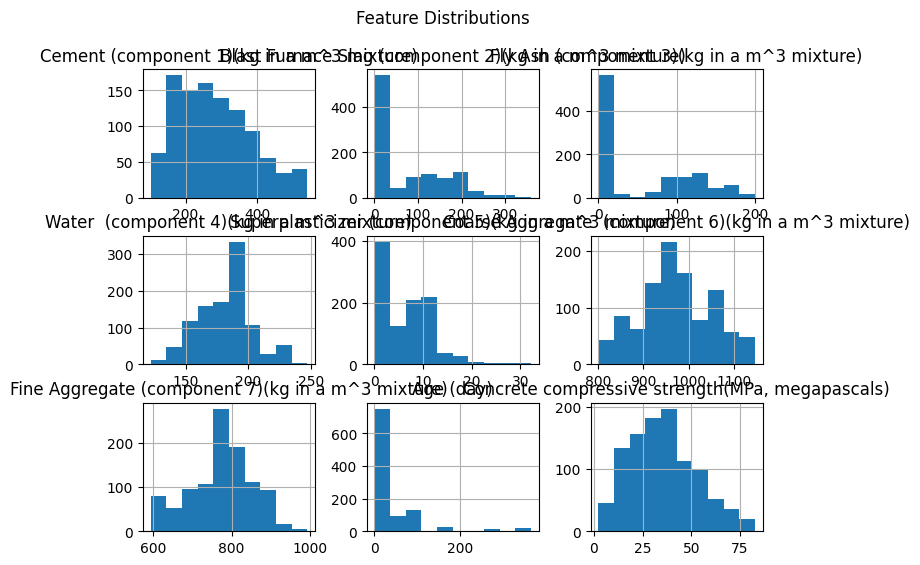

In [40]:
concrete_data.hist(figsize=(8, 6))
plt.suptitle('Feature Distributions')
plt.show()

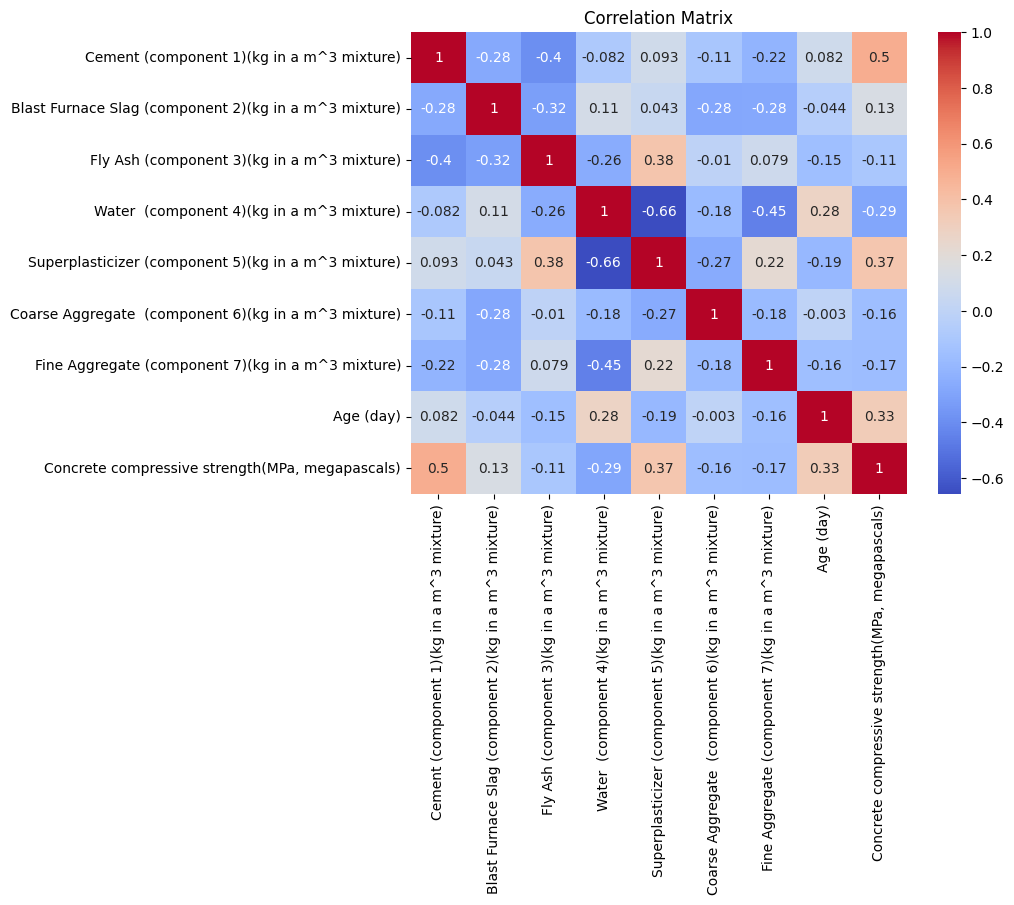

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(concrete_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [42]:
X_concrete = concrete_data.drop('Concrete compressive strength(MPa, megapascals)', axis=1)
y_concrete = concrete_data['Concrete compressive strength(MPa, megapascals)']

In [43]:
X_train_concrete, X_test_concrete, y_train_concrete, y_test_concrete = train_test_split(X_concrete, y_concrete, test_size=0.2, random_state=42)

In [44]:
scaler = StandardScaler()
X_train_concrete = scaler.fit_transform(X_train_concrete)
X_test_concrete = scaler.transform(X_test_concrete)

In [45]:
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_concrete, y_train_concrete)

SVR(kernel='linear')

In [46]:
y_pred_concrete = svm_regressor.predict(X_test_concrete)
print("Mean Squared Error:", mean_squared_error(y_test_concrete, y_pred_concrete))
print("R-squared:", r2_score(y_test_concrete, y_pred_concrete))


Mean Squared Error: 119.24965703016935
R-squared: 0.5372199880390223


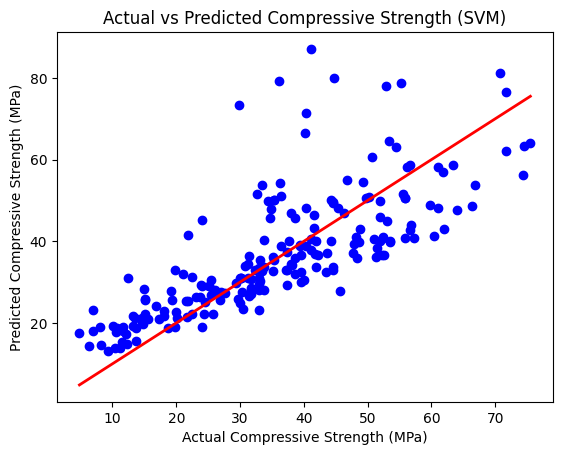

In [47]:
plt.scatter(y_test_concrete, y_pred_concrete, color='blue')
plt.plot([y_test_concrete.min(), y_test_concrete.max()], [y_test_concrete.min(), y_test_concrete.max()], color='red', linewidth=2)
plt.xlabel('Actual Compressive Strength (MPa)')
plt.ylabel('Predicted Compressive Strength (MPa)')
plt.title('Actual vs Predicted Compressive Strength (SVM)')
plt.show()